In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['classes'] = pd.Categorical.from_codes(data.target, data.target_names)
print("Primer análisis de los datos")
df.head()

Primer análisis de los datos


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [3]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
print("Descripción de los datos")
df.describe()

Descripción de los datos


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
print("El número de líneas es: " + str(df.shape[0]) + " y el número de columnas: "+ str(df.shape[1]))

El número de líneas es: 178 y el número de columnas: 14


In [7]:
print("No existe ningún null")

df.isnull().sum()

No existe ningún null


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
classes                         0
dtype: int64

Cálculo de la frecuéncia
Frecuéncia
class_1    71
class_0    59
class_2    48
dtype: int64


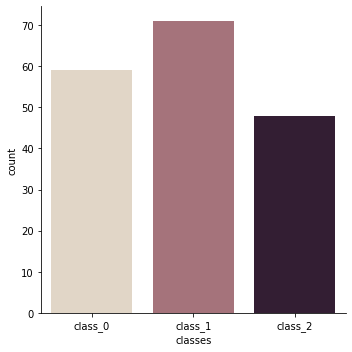

In [8]:
print('Cálculo de la frecuéncia')
cols = df.columns
num_cols_no_categoric = df._get_numeric_data().columns

col_categoric=list(set(cols) - set(num_cols_no_categoric))
print("Frecuéncia")
print( pd.value_counts(df[col_categoric].values.flatten()))
frecuencia_data =pd.value_counts(df[col_categoric].values.flatten())

sns.catplot(x="classes", kind="count", palette="ch:.25", data=df);

<AxesSubplot:>

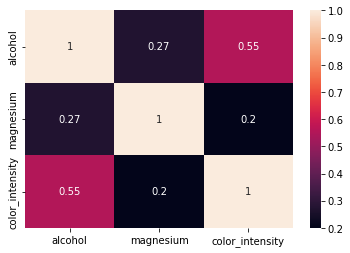

In [9]:
#Tabla correlacion del Alcohol, Magnisio y Intensidad del Color
correlation_matrix = df[['alcohol','magnesium','color_intensity']].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [10]:
x = df.loc[:,df.columns != 'classes'].values
y = df.loc[:,['classes']].values

In [11]:
#División de datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1) # 70% training and 30% test

print("X_train: ", X_train.shape)
print("X_test ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


X_train:  (133, 13)
X_test  (45, 13)
y_train:  (133, 1)
y_test:  (45, 1)


In [12]:
#Clasificación del árbol de decisión
# Crear objeto clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Clasificador de árboles de decisión del tren
clf = clf.fit(X_train,y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [13]:
# calculate accuracy

print(metrics.accuracy_score(y_test, y_pred))

0.9555555555555556


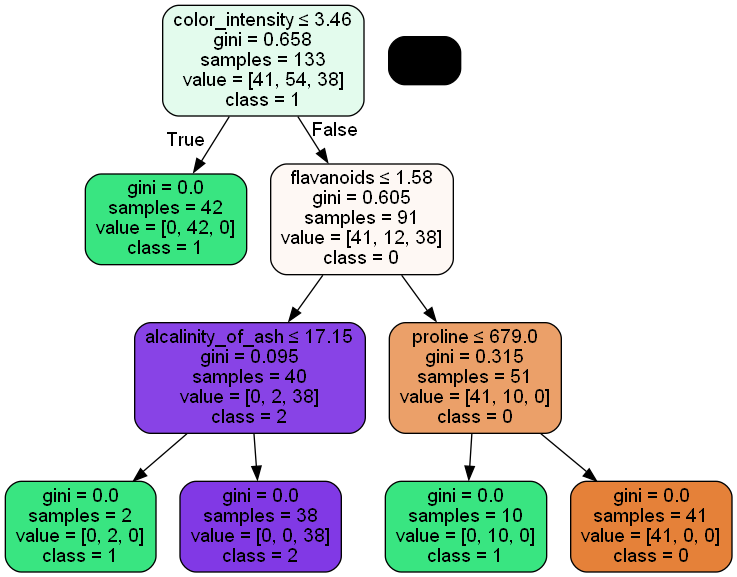

In [14]:
from six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus

dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = data.feature_names,
                class_names=['0','1','2']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('treeVino.png') 
Image(graph.create_png())

In [15]:
# Crear objeto clasificador de árbol de decisión
clf = DecisionTreeClassifier(criterion="entropy")

# Clasificador de árboles de decisión de tren
clf = clf.fit(X_train,y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)


In [19]:
# calculate accuracy

print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


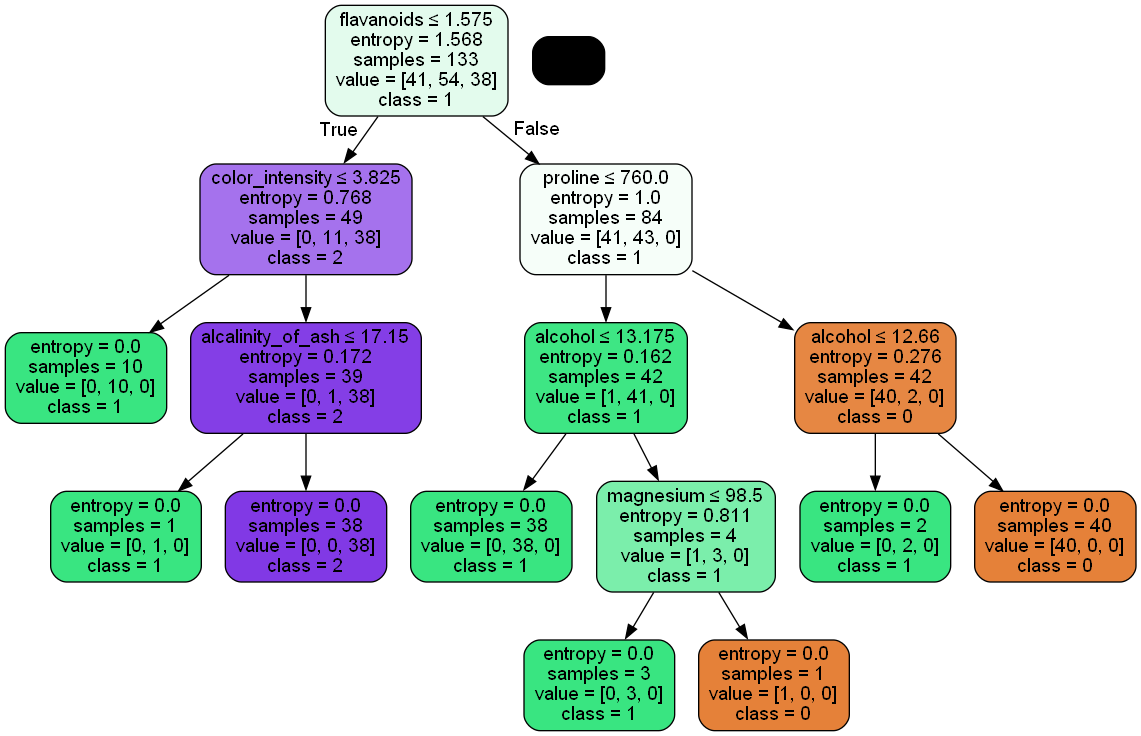

In [18]:
dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = data.feature_names,
                class_names=['0','1','2']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('treeVino2.png') 
Image(graph.create_png())

In [20]:
x = df.loc[:,df.columns != 'classes'].values
y = df.loc[:,['classes']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1) # 70% training and 30% test

print("X_train: ", X_train.shape)
print("X_test ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


X_train:  (133, 13)
X_test  (45, 13)
y_train:  (133, 1)
y_test:  (45, 1)


In [21]:
#Importar modelo svm
from sklearn import svm

#Crear un Clasificador svm
clf = svm.SVC(kernel='linear') # Linear Kernel

#Entrena al modelo usando los conjuntos de entrenamiento
clf.fit(X_train, y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [22]:
# calculate accuracy

print(metrics.accuracy_score(y_test, y_pred))

0.9555555555555556


In [29]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = metrics.confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['class_0','class_1','class_2'], 
                     columns = ['class_0','class_1','class_2'])

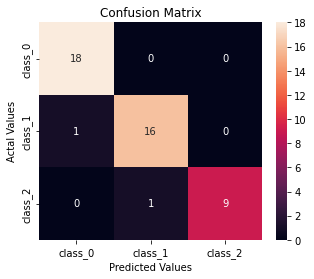

In [30]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [54]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred, labels=['class_0','class_1','class_2'],average='weighted')
Sensitivity_recall = metrics.recall_score(y_test, y_pred, labels=['class_0','class_1','class_2'],average='weighted')
Specificity = metrics.recall_score(y_test, y_pred, labels=['class_0','class_1','class_2'],average='weighted')
F1_score = metrics.f1_score(y_test, y_pred, labels=['class_0','class_1','class_2'],average='weighted')
            
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9555555555555556, 'Precision': 0.9567251461988304, 'Sensitivity_recall': 0.9555555555555556, 'Specificity': 0.9555555555555556, 'F1_score': 0.9552710605342185}


In [57]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, labels=['class_0','class_1','class_2'], target_names=['class_0','class_1','class_2'])
print(report)

              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       0.94      0.94      0.94        17
     class_2       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [64]:
# Aplicar validación cruzada para evaluar los resultados.
scores=cross_val_score(clf,X_train,y_train,cv=5)
scores

array([0.96296296, 0.92592593, 0.96296296, 0.96153846, 0.92307692])

In [65]:
#Calculate the mean and the standard deviation of the validation
print("Mean: %0.2f ; Standard Dev.: %0.2f)" % (scores.mean(), scores.std()))

Mean: 0.95 ; Standard Dev.: 0.02)
